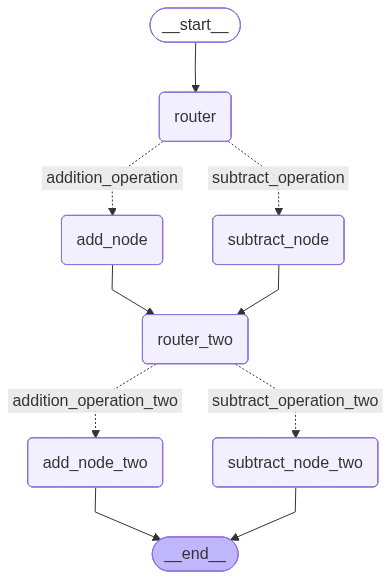

(15, 4)

In [6]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image


class AgentState(TypedDict):
    number_one: int
    number_two: int
    operation: str
    operation_two: str
    number_three: int
    number_four: int
    result_one: int
    result_two: int

def add_nodes(state: AgentState) -> AgentState:
    """Node to add numbers."""
    state['result_one'] = state['number_one'] + state['number_two']
    return state

def subtract_nodes(state: AgentState) -> AgentState:
    """Node to subtract numbers."""
    state['result_one'] = state['number_one'] - state['number_two']
    return state

def add_node2(state: AgentState) -> AgentState:
    """Node to add results."""
    state['result_two'] = state['number_three'] + state['number_four']
    return state

def subtract_node2(state: AgentState) -> AgentState:
    """Node to subtract results."""
    state['result_two'] = state['number_three'] - state['number_four']
    return state

def first_decission_node(state: AgentState) -> AgentState:
    """Decide next node based on comparison of results."""
    if state['operation'] == '+':   
        return "addition_operation"
    elif state['operation'] == '-':
        return "subtract_operation"
    else:
        raise ValueError("Invalid operation")

def second_decission_node(state: AgentState) -> AgentState:
    """Decide next node based on comparison of results."""
    if state['operation_two'] == '+':   
        return "addition_operation_two"
    elif state['operation_two'] == '-':
        return "subtract_operation_two"
    else:
        raise ValueError("Invalid operation")
    
graph = StateGraph(AgentState)
graph.add_node("add_node", add_nodes)
graph.add_node("subtract_node", subtract_nodes)
graph.add_node("router", lambda state:state) # pass-through router node
graph.add_node("router_two", lambda state:state) # pass-through router node
graph.add_node("add_node_two", add_node2)
graph.add_node("subtract_node_two", subtract_node2)

graph.add_edge(START, "router")
graph.add_conditional_edges("router", first_decission_node, {
    "addition_operation": "add_node",
    "subtract_operation": "subtract_node"
})
graph.add_edge("add_node", "router_two")
graph.add_edge("subtract_node", "router_two")
graph.add_conditional_edges("router_two", second_decission_node, {
    "addition_operation_two": "add_node_two",
    "subtract_operation_two": "subtract_node_two"
})
graph.add_edge("add_node_two", END)
graph.add_edge("subtract_node_two", END)
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

initial_state = AgentState(number_one=10, number_two=5, operation='+',
                          number_three=7, number_four=3, operation_two='-',
                          result_one=0, result_two=0)
result = app.invoke(initial_state)
result['result_one'], result['result_two']